#### Predict customer churn based on previous data

## Using Telco Customer Churn


#### The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

#### Import data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Clean Data

In [3]:
data.isna().sum()    #check for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [234]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [281]:
data1 = data.copy()

In [282]:
data1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [283]:
data1['Churn'] = data1['Churn'].map({'Yes' : 1, 'No' : 0})

#### Check overall churn rate

In [284]:
data1['Churn'] = data1[['Churn']].astype('int')

In [285]:
data1['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

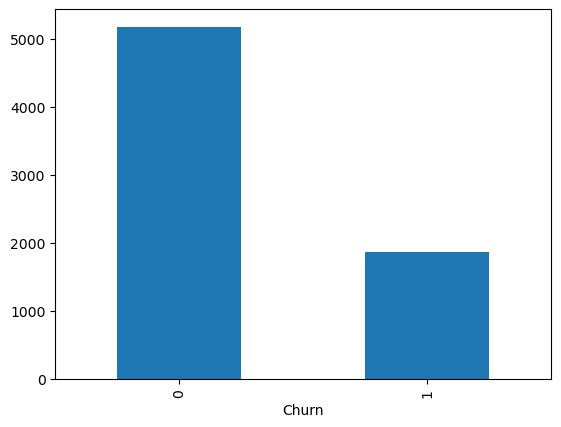

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

data1['Churn'].value_counts().plot(kind = 'bar')
plt.show()

In [287]:
churn_total = data1['Churn'].value_counts()[0]
retained_total = data1['Churn'].value_counts()[1]
total_cus_count = data1['Churn'].value_counts().sum()

In [288]:
retained_perc = retained_total / total_cus_count * 100
attrition_perc = churn_total / total_cus_count * 100
print(f"Churned customers percentage : {attrition_perc:.2f}%\nRetained customers percentage : {retained_perc:.2f}%") 

Churned customers percentage : 73.46%
Retained customers percentage : 26.54%


In [289]:
data1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [290]:
data1['gender'] = data1['gender'].map({'Female' : 0, 'Male' : 1})

In [291]:
data1['gender'].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

#### Total number of male = 3555, female = 3488

In [292]:
pd.options.display.max_columns = 30
data1.head(2)   #Partner, Dependents, 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0


In [293]:
#Map binary object category data
data1['Partner'] = data1['Partner'].map({'Yes' : 1, 'No' : 0})   
data1['Dependents'] = data1['Dependents'].map({'Yes' : 1, 'No' : 0})
data1['PhoneService'] = data1['PhoneService'].map({'Yes' : 1, 'No' : 0})
data1['OnlineSecurity'] = data1['OnlineSecurity'].map({'Yes' : 1, 'No' : 0, 'No internet service': 3})
data1['OnlineBackup'] = data1['OnlineBackup'].map({'Yes' : 1, 'No' : 0, 'No internet service': 3})
data1['DeviceProtection'] = data1['DeviceProtection'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 3})
data1['TechSupport'] = data1['TechSupport'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 3})
data1['StreamingTV'] = data1['StreamingTV'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 3})
data1['StreamingMovies'] = data1['StreamingMovies'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 3})
data1['PaperlessBilling'] = data1['PaperlessBilling'].map({'Yes' : 1, 'No' : 0})
data1['Contract'] = data1['Contract'].map({'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2})
# data1['PaymentMethod'] = data1['PaymentMethod'].map({'Yes' : 1, 'No' : 0})

data1['MultipleLines'] = data1['MultipleLines'].map({'No phone service' : 0 ,  'No' : 1, 'Yes' : 2})
data1['InternetService'] = data1['InternetService'].map({'DSL' : 0, 'Fiber optic' : 1, 'No' : 2})
# data1['Contract'] = data1['Contract'].map({'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2})
# data1['PaymentMethod'] = data1['PaymentMethod'].map({'Electronic check' : 0, 'Mailed check' : 1, 'Bank transfer (automatic)' : 2,
#        'Credit card (automatic)' : 3})

In [294]:
data1['Partner'] = data1['Partner'].astype('int')
data1['Dependents'] = data1['Dependents'].astype('int')
data1['PhoneService'] = data1['PhoneService'].astype('int')
data1['OnlineSecurity'] = data1['OnlineSecurity'].astype('int')
data1['OnlineBackup'] = data1['OnlineBackup'].astype('int')
data1['DeviceProtection'] = data1['DeviceProtection'].astype('int')
data1['TechSupport'] = data1['TechSupport'].astype('int')
data1['StreamingTV'] = data1['StreamingTV'].astype('int')
data1['StreamingMovies'] = data1['StreamingMovies'].astype('int')
data1['PaperlessBilling'] = data1['PaperlessBilling'].astype('int')

In [295]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [296]:
data1 = pd.get_dummies(data1,columns=['Contract', 'PaymentMethod'], drop_first = True, dtype = 'int')
data1.head()         

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_1,Contract_2,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,1,0,0,0,0,0,0,1,70.70,151.65,1,0,0,0,1,0


In [297]:
data1.isna().sum()

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
InternetService                          0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Contract_1                               0
Contract_2                               0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [298]:
data1 = data1.drop('customerID', axis = 1)    

In [299]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [329]:
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'])
# data1['TotalCharges']  #.str.contains('') #.count()

In [339]:
scaler = MinMaxScaler((0.1, 3))
data1[['MonthlyCharges', 'MonthlyCharges', 'tenure']] = scaler.fit_transform(data1[['MonthlyCharges', 'MonthlyCharges', 'tenure']])
data1[['TotalCharges']] = scaler.fit_transform(data1[['TotalCharges']])

In [340]:
data1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_1,Contract_2,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.140278,0,0,0,0,1,0,0,0,0,1,0.434726,0.109918,0,0,0,0,1,0
1,1,0,0,0,1.469444,1,1,0,1,0,1,0,0,0,0,1.216716,0.163121,0,1,0,0,0,1


#### Features handled and scaled.
    Next is to check the feature importances and multi-collinearity

In [341]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [383]:
x = data1.drop('Churn', axis = 1)


In [367]:
#check for null values
x[x['TotalCharges'].isna()==True] #.sum()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_1,Contract_2,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,1,1,0.1,0,0,0,1,0,1,1,1,0,1,1.089751,NaN,0,1,0,0,0
753,1,0,0,1,0.1,1,1,2,3,3,3,3,3,3,0,0.157711,NaN,0,1,0,0,1
936,0,0,1,1,0.1,1,1,0,1,1,1,0,1,1,0,1.906368,NaN,0,1,0,0,1
1082,1,0,1,1,0.1,1,2,2,3,3,3,3,3,3,0,0.316418,NaN,0,1,0,0,1
1340,0,0,1,1,0.1,0,0,0,1,1,1,1,1,0,0,1.190746,NaN,0,1,1,0,0
3331,1,0,1,1,0.1,1,1,2,3,3,3,3,3,3,0,0.146169,NaN,0,1,0,0,1
3826,1,0,1,1,0.1,1,2,2,3,3,3,3,3,3,0,0.304876,NaN,0,1,0,0,1
4380,0,0,1,1,0.1,1,1,2,3,3,3,3,3,3,0,0.150498,NaN,0,1,0,0,1
5218,1,0,1,1,0.1,1,1,2,3,3,3,3,3,3,1,0.141841,NaN,1,0,0,0,1
6670,0,0,1,1,0.1,1,2,0,0,1,1,1,1,0,0,1.689950,NaN,0,1,0,0,1


Import imputer to fill null values 

In [374]:
from sklearn.impute import KNNImputer

In [375]:
imputer = KNNImputer(n_neighbors=5)


In [380]:
x.shape

(7043, 22)

In [385]:
x2 = imputer.fit_transform(x)
x = pd.DataFrame(x2, columns=x.columns)

Now check for multi-collinearity

In [389]:
VIF = variance_inflation_factor
data_vif = pd.DataFrame({})
data_vif['Features'] = x.columns
data_vif['VIF'] = [VIF(x.values, i) for i in range (x.shape[1])]

In [390]:
data_vif

,Features,VIF
0,gender,1.938912
1,SeniorCitizen,1.365280
2,Partner,2.823266
3,Dependents,1.963174
4,tenure,8.974766
5,PhoneService,20.863046
6,MultipleLines,12.909610
7,InternetService,9.833752
8,OnlineSecurity,13.539937
9,OnlineBackup,12.758019


In [392]:
x.corr().head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_1,Contract_2,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.0,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.000863,-0.000214,0.000788,0.005642,0.002805,0.002992,0.002082,-0.011754,-0.014569,0.001908,0.008026,-0.003695,0.001215,0.000752,0.013744


#### Use a simple Model (Logistic Regression)

In [397]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

###### Load and fit model

In [ ]:
model_Log = LogisticRegre